# **1. 면적 데이터 전처리**
### **1. 데이터 불러오기**
##### 1. 면적데이터 파일

In [492]:
import pandas as pd
import matplotlib.pyplot as plt

df_area = pd.read_csv('./dataset/pop_density/Deagu_area.csv')


# 필요한 컬럼만 추출하고 column명을 인구수 데이터와 통일

df_area = df_area[['행정동', '면적 (km²)']].rename(columns={'행정동':'행정구역'})

df_area

,행정구역,면적 (km²)
0,고성동,0.53
1,칠성동,1.36
2,침산1동,1.21
3,침산2동,0.99
4,침산3동,1.07
...,...,...
137,옥포읍,48.94
138,현풍읍,24.47
139,가창면,111.17
140,하빈면,36.7


In [493]:
# null 값 확인
df_area['면적 (km²)'].isnull().sum()

0

### **2. 인구수 데이터와 면적 데이터 JOIN**
##### 1. 인구수 데이터 불러오기

In [494]:
df_pop = pd.read_csv('./dataset/pop_density/Deagu_population.csv', index_col=0)

df_pop

,행정구역,year,month,count
0,동인1.2.4가동,2010,10,"6,091"
1,동인3가동,2010,10,"4,649"
2,삼덕동,2010,10,"4,523"
3,성내1동,2010,10,"4,525"
4,성내2동,2010,10,"5,097"
...,...,...,...,...
19822,범물1동,2022,4,"11,205"
19823,범물2동,2022,4,"16,932"
19824,고산1동,2022,4,"31,014"
19825,고산2동,2022,4,"28,518"


##### 2. 면적 데이터와 join

In [495]:
df_JOIN = pd.merge(df_pop, df_area, left_on='행정구역', right_on='행정구역', how='outer')

df_JOIN

,행정구역,year,month,count,면적 (km²)
0,동인1.2.4가동,2010.0,10.0,"6,091",NaN
1,동인1.2.4가동,2010.0,11.0,"6,083",NaN
2,동인1.2.4가동,2010.0,12.0,"6,120",NaN
3,동인1.2.4가동,2011.0,1.0,"6,112",NaN
4,동인1.2.4가동,2011.0,2.0,"6,112",NaN
...,...,...,...,...,...
19823,고산3동,2022.0,1.0,"33,164",5.01
19824,고산3동,2022.0,2.0,"33,029",5.01
19825,고산3동,2022.0,3.0,"32,947",5.01
19826,고산3동,2022.0,4.0,"32,839",5.01


### **3. JOIN한 데이터 확인**

##### 1. JOIN한 데이터의 null 값 확인 및 처리

In [496]:
# null 값 확인

df_JOIN['면적 (km²)'].isnull().sum()

957

In [497]:
# null 값이 있는 행 확인

df_JOIN[df_JOIN['면적 (km²)'].isnull()]

,행정구역,year,month,count,면적 (km²)
0,동인1.2.4가동,2010.0,10.0,"6,091",NaN
1,동인1.2.4가동,2010.0,11.0,"6,083",NaN
2,동인1.2.4가동,2010.0,12.0,"6,120",NaN
3,동인1.2.4가동,2011.0,1.0,"6,112",NaN
4,동인1.2.4가동,2011.0,2.0,"6,112",NaN
...,...,...,...,...,...
16330,유가면,2018.0,8.0,0,NaN
16331,유가면,2018.0,9.0,0,NaN
16332,유가면,2018.0,10.0,0,NaN
16333,유가면,2018.0,11.0,0,NaN


##### 2. 행정구역 목록 확인

In [498]:
# null 값이 들어있는 행정구역 목록 (겹치지 않는 행정구역)

df_JOIN[df_JOIN['면적 (km²)'].isnull()].groupby('행정구역').sum().index

Index(['논공읍공단출장소', '다사읍서재출장소', '대현1동', '대현2동', '동인1.2.4가동', '동인3가동', '두류1동',
       '두류2동', '불로.봉무동', '성당1동', '성당2동', '안심3.4동', '옥포면', '유가면', '현풍면'],
      dtype='object', name='행정구역')

In [499]:
# area 파일의 행정구역 이름을 확인

df_area['행정구역'].values

array(['고성동', '칠성동', '침산1동', '침산2동', '침산3동', '산격1동', '산격2동', '산격3동',
       '산격4동', '대현동', '복현1동', '복현2동', '검단동', '노원동', '무태조야동', '관문동',
       '태전1동', '태전2동', '구암동', '관음동', '읍내동', '동천동', '국우동', '동인동', '삼덕동',
       '성내1동', '성내2동', '성내3동', '대신동', '남산1동', '남산2동', '남산3동', '남산4동',
       '대봉1동', '대봉2동', '내당1동', '내당2.3동', '내당4동', '비산1동', '비산2.3동', '비산4동',
       '비산5동', '비산6동', '비산7동', '평리1동', '평리2동', '평리3동', '평리4동', '평리5동',
       '평리6동', '상중이동', '원대동', '성당동', '두류1.2동', '두류3동', '본리동', '감삼동',
       '죽전동', '장기동', '용산1동', '용산2동', '이곡1동', '이곡2동', '신당동', '월성1동',
       '월성2동', '진천동', '유천동', '상인1동', '상인2동', '상인3동', '도원동', '송현1동',
       '송현2동', '본동', '이천동', '봉덕1동', '봉덕2동', '봉덕3동', '대명1동', '대명2동',
       '대명3동', '대명4동', '대명5동', '대명6동', '대명9동', '대명10동', '대명11동', '신암1동',
       '신암2동', '신암3동', '신암4동', '신암5동', '신천1.2동', '신천3동', '신천4동', '효목1동',
       '효목2동', '도평동', '불로봉무동', '지저동', '동촌동', '방촌동', '해안동', '안심1동', '안심2동',
       '안심3동', '안심4동', '혁신동', '공산동', '범어1동', '범어2동', '범어3동', '범어4동',
       '만촌1동

In [500]:
# pop 파일의 행정구역 이름을 확인

df_pop['행정구역'].unique()

array(['동인1.2.4가동', '동인3가동', '삼덕동', '성내1동', '성내2동', '성내3동', '대신동', '남산1동',
       '남산2동', '남산3동', '남산4동', '대봉1동', '대봉2동', '동인동', '신암1동', '신암2동',
       '신암3동', '신암4동', '신암5동', '신천1.2동', '신천3동', '신천4동', '효목1동', '효목2동',
       '도평동', '불로.봉무동', '지저동', '동촌동', '방촌동', '해안동', '안심1동', '안심2동',
       '안심3.4동', '공산동', '안심3동', '안심4동', '혁신동', '내당1동', '내당2.3동', '내당4동',
       '비산1동', '비산2.3동', '비산4동', '비산5동', '비산6동', '비산7동', '평리1동', '평리2동',
       '평리3동', '평리4동', '평리5동', '평리6동', '상중이동', '원대동', '이천동', '봉덕1동',
       '봉덕2동', '봉덕3동', '대명1동', '대명2동', '대명3동', '대명4동', '대명5동', '대명6동',
       '대명9동', '대명10동', '대명11동', '고성동', '칠성동', '침산1동', '침산2동', '침산3동',
       '산격1동', '산격2동', '산격3동', '산격4동', '대현1동', '대현2동', '복현1동', '복현2동',
       '검단동', '무태조야동', '관문동', '태전1동', '태전2동', '구암동', '관음동', '읍내동', '동천동',
       '노원동', '국우동', '대현동', '성당1동', '성당2동', '두류1동', '두류2동', '두류3동', '감삼동',
       '죽전동', '장기동', '용산1동', '용산2동', '이곡1동', '이곡2동', '신당동', '본리동', '월성1동',
       '월성2동', '진천동', '상인1동', '상인2동', '상인3동', '도원동', '송현1동', '

In [501]:
# 파일명 체크용 코드

'다사읍' in list(df_area['행정구역'].values)

True

# **2. 결측값 없이 JOIN을 위해 다시 전처리**
### **1. 데이터 불러오기**

In [502]:
# 인구수 데이터 불러오기
df_pop = pd.read_csv('./dataset/pop_density/Deagu_population.csv', index_col=0, thousands = ',')

# 면적 데이터 불러오기
df_area = pd.read_csv('./dataset/pop_density/Deagu_area.csv')

### **2. 데이터 탐색**
**pop 파일**엔 2020년 6월부터 **안심3.4동**이 **3동**과 **4동**으로 분리  
**area 파일**엔 **안심 3동**과 **안심 4동**이 분리되어 있음

참고

* 2020년 7월 6일 **안심3·4동**을 **안심3동, 안심4동, 혁신동**으로 분동하고, 불로봉무동과 지저동 등의 행정 구역을 조정하였다.  
출처 : https://ko.wikipedia.org/wiki/%EB%8C%80%EA%B5%AC_%EB%8F%99%EA%B5%AC%EC%9D%98_%ED%96%89%EC%A0%95_%EA%B5%AC%EC%97%AD

In [503]:
# 2020년의 안심동 데이터 확인
area_list = ['안심3동', '안심4동', '안심3.4동', '혁신동']
df_pop[(df_pop['행정구역'].isin(area_list)) & (df_pop['year'] == 2020)]

,행정구역,year,month,count
3933,안심3동,2020,1,0
3934,안심3.4동,2020,1,69135
3935,안심4동,2020,1,0
3936,혁신동,2020,1,0
3956,안심3동,2020,2,0
3957,안심3.4동,2020,2,69040
3958,안심4동,2020,2,0
3959,혁신동,2020,2,0
3979,안심3동,2020,3,0
3980,안심3.4동,2020,3,69150


일관성을 위해 2020년 6월 이전의 **안심3.4동** 데이터를 **안심3동과 안심4동, 혁신동**으로 분리 


* 분리기준  
2020년 6월 이후의 **안심3동, 안심4동, 혁신동** 인구수 비율 평균을 구해  
2020년 6월 이전의 **안심3.4동** 인구수에 비율을 적용해 분리

##### 1. 계산을 위한 column 생성

In [504]:
# 2020년 6월 이후 안심3동, 안심4동, 혁신동 합계를 'sum' column에 저장

region_list = ['안심3동','안심4동','혁신동']

filter_2020 = ((df_pop['행정구역'].isin(region_list)) & (df_pop['year'] == 2020) & (df_pop['month'] > 6))
filter_over_2020 = ((df_pop['행정구역'].isin(region_list)) & (df_pop['year'] > 2020))

for year_ansim in range(2020, 2023):
    if year_ansim == 2020:
        for month_ansim in range(7, 13):
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'sum'] = \
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'count'].sum()
    
    else:
        for month_ansim in range(1, 13):
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'sum'] = \
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'count'].sum()


# 'sum' column을 활용하여 계산한 안심3.4동 내의 구성 비율을 'rate' column에 저장

for year_ansim in range(2020, 2023):
    if year_ansim == 2020:
        for month_ansim in range(7, 13):
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'rate'] = \
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'count'] \
            / df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'sum']
    
    else:
        for month_ansim in range(1, 13):
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'rate'] = \
            df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'count'] \
            / df_pop.loc[(df_pop['year'] == year_ansim) & (df_pop['month'] == month_ansim) & (filter_2020 | filter_over_2020), 'sum']


df_pop[filter_2020 | filter_over_2020] # 확인용


,행정구역,year,month,count,sum,rate
4071,안심3동,2020,7,21450,69744.0,0.307553
4073,안심4동,2020,7,29515,69744.0,0.423191
4074,혁신동,2020,7,18779,69744.0,0.269256
4094,안심3동,2020,8,21443,69803.0,0.307193
4096,안심4동,2020,8,29515,69803.0,0.422833
...,...,...,...,...,...,...
4518,안심4동,2022,3,28707,69237.0,0.414619
4519,혁신동,2022,3,18594,69237.0,0.268556
4539,안심3동,2022,4,21941,69162.0,0.317241
4540,안심4동,2022,4,28605,69162.0,0.413594


##### 2. 생성한 rate column으로 행정구역별 구성비율 분포 확인

##### **안심3동**


시간에 따른 변화 확인
* 2021년 11월 이후에 큰 증가폭이 관찰되었다.
* 2020년 6월 이전의 데이터에 비율을 적용할 것이기 때문에  
변동폭을 줄이기 위하여 2021년 11월 이후의 rate 값은 제외한다.

In [505]:
# x축 값을 주기위해 연도+월 column 생성

df_pop.loc[df_pop['month'] < 10, 'X'] = df_pop['year'].astype('str') + '0' + df_pop['month'].astype('str')
df_pop.loc[df_pop['month'] >= 10, 'X'] = df_pop['year'].astype('str') + df_pop['month'].astype('str')

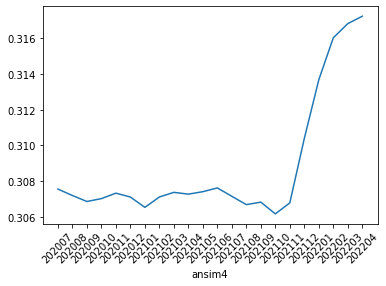

In [506]:
df_pop = df_pop.fillna(0)

df_pop = df_pop.astype({'X':'str'})

# 그래프로 확인

graph_filter_H = df_pop[((df_pop['행정구역']=='안심3동') & ((df_pop['year'] == 2020) & (df_pop['month'] > 6)))\
                       | ((df_pop['행정구역']=='안심3동') & (df_pop['year'] > 2020))]

xs = graph_filter_H['X'].to_list()
ys = graph_filter_H['rate'].to_list()

plt.plot(xs, ys)
plt.xticks(ticks=xs, rotation=45)
plt.xlabel('ansim4')
plt.locator_params(axis='x', nbins=len(xs))

* rate column 범위 지정

In [507]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '안심3동') & (df_pop['X'] < 202111) & (df_pop['X'] > 202006), 'rate'].describe()

count    16.000000
mean      0.307074
std       0.000387
min       0.306164
25%       0.306849
50%       0.307130
75%       0.307336
max       0.307619
Name: rate, dtype: float64

*  지정한 범위 내의 안심3동 rate mean 값을 변수에 저장

In [508]:
mean_3 = df_pop.loc[(df_pop['행정구역'] == '안심3동') & (df_pop['X'] < 202111) & (df_pop['X'] > 202006), 'rate'].mean()

mean_3

0.30707382746511624

##### **안심4동**


시간에 따른 변화 확인
* 2021년 10월 이후에 큰 감소폭이 관찰되었다.
* 2020년 6월 이전의 데이터에 비율을 적용할 것이기 때문에  
변동폭을 줄이기 위하여 2021년 10월 이후의 rate 값은 제외한다.

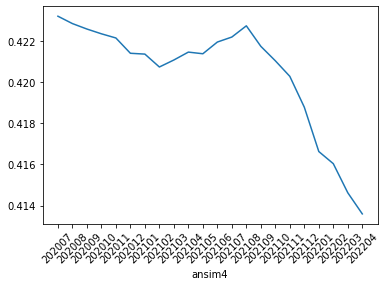

In [509]:
df_pop = df_pop.astype({'X':'str'})

graph_filter_H = df_pop[((df_pop['행정구역']=='안심4동') & ((df_pop['year'] == 2020) & (df_pop['month'] > 6)))\
                       | ((df_pop['행정구역']=='안심4동') & (df_pop['year'] > 2020))]

xs = graph_filter_H['X'].to_list()
ys = graph_filter_H['rate'].to_list()

plt.plot(xs, ys)
plt.xticks(ticks=xs, rotation=45)
plt.xlabel('ansim4')
plt.locator_params(axis='x', nbins=len(xs))

* rate column 범위 지정

In [510]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '안심4동') & (df_pop['X'] < 202110) & (df_pop['X'] > 202006), 'rate'].describe()

count    15.000000
mean      0.421932
std       0.000713
min       0.420725
25%       0.421380
50%       0.421936
75%       0.422452
max       0.423191
Name: rate, dtype: float64

* 지정한 범위 내의 안심4동 rate mean 값을 변수에 저장

In [511]:
mean_4 = df_pop.loc[(df_pop['행정구역'] == '안심4동') & (df_pop['X'] < 202110) & (df_pop['X'] > 202006), 'rate'].mean()

mean_4

0.4219319262905244

##### **혁신동**


시간에 따른 변화 확인
* 2021년 12월 이후에 큰 감소폭이 관찰되었다.
* 2020년 6월 이전의 데이터에 비율을 적용할 것이기 때문에  
변동폭을 줄이기 위하여 2021년 8월 이후의 rate 값은 제외한다.

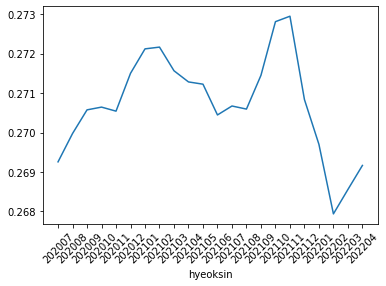

In [512]:
df_pop = df_pop.astype({'X':'str'})

graph_filter_H = df_pop[((df_pop['행정구역']=='혁신동') & ((df_pop['year'] == 2020) & (df_pop['month'] > 6)))\
                       | ((df_pop['행정구역']=='혁신동') & (df_pop['year'] > 2020))]

xs = graph_filter_H['X'].to_list()
ys = graph_filter_H['rate'].to_list()

plt.plot(xs, ys)
plt.xticks(ticks=xs, rotation=45)
plt.xlabel('hyeoksin')
plt.locator_params(axis='x', nbins=len(xs))

* rate column 범위 지정

In [513]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '혁신동') & (df_pop['X'] < 202112) & (df_pop['X'] > 202006), 'rate'].describe()

count    17.000000
mean      0.271162
std       0.000979
min       0.269256
25%       0.270574
50%       0.271225
75%       0.271565
max       0.272947
Name: rate, dtype: float64

* 지정한 범위 내의 안심4동 rate mean 값을 변수에 저장

In [514]:
mean_H = df_pop.loc[(df_pop['행정구역'] == '혁신동') & (df_pop['X'] < 202112) & (df_pop['X'] > 202006), 'rate'].mean()

mean_H

0.2711623389096784

##### **비율 평균 변수 저장 결과**

In [515]:
print('안심3동 : ', mean_3)
print('안심4동 : ', mean_4)
print('혁신동 : ', mean_H)

print('')
print('총합 : ', mean_3+mean_4+mean_H)

안심3동 :  0.30707382746511624
안심4동 :  0.4219319262905244
혁신동 :  0.2711623389096784

총합 :  1.0001680926653191


### **3. 전처리**
* 2020년 이전에는 행정구역에 안심3동, 안심4동, 혁신동이 없다.

In [516]:
df_pop.loc[(df_pop['행정구역'] == '안심3동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
3933,안심3동,2020,1,0,0.0,0.0,202001
3956,안심3동,2020,2,0,0.0,0.0,202002
3979,안심3동,2020,3,0,0.0,0.0,202003
4002,안심3동,2020,4,0,0.0,0.0,202004
4025,안심3동,2020,5,0,0.0,0.0,202005


In [517]:
df_pop.loc[(df_pop['행정구역'] == '안심4동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
3935,안심4동,2020,1,0,0.0,0.0,202001
3958,안심4동,2020,2,0,0.0,0.0,202002
3981,안심4동,2020,3,0,0.0,0.0,202003
4004,안심4동,2020,4,0,0.0,0.0,202004
4027,안심4동,2020,5,0,0.0,0.0,202005


In [518]:
df_pop.loc[(df_pop['행정구역'] == '혁신동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
3936,혁신동,2020,1,0,0.0,0.0,202001
3959,혁신동,2020,2,0,0.0,0.0,202002
3982,혁신동,2020,3,0,0.0,0.0,202003
4005,혁신동,2020,4,0,0.0,0.0,202004
4028,혁신동,2020,5,0,0.0,0.0,202005


##### 1. 2019년까지의 row에 3개의 동 추가

In [519]:
for year in range(2010, 2020):
    if year == 2010:
        for month in range(10, 13):
            df_pop.loc[len(df_pop)] = ['안심3동', year, month, 0, 0, 0, str(year)+str(month)]
            df_pop.loc[len(df_pop)] = ['안심4동', year, month, 0, 0, 0, str(year)+str(month)]
            df_pop.loc[len(df_pop)] = ['혁신동', year, month, 0, 0, 0, str(year)+str(month)]

    else:
        for month in range(1, 13):
            if month < 10:
                df_pop.loc[len(df_pop)] = ['안심3동', year, month, 0, 0, 0, str(year)+ '0' + str(month)]
                df_pop.loc[len(df_pop)] = ['안심4동', year, month, 0, 0, 0, str(year)+ '0' + str(month)]
                df_pop.loc[len(df_pop)] = ['혁신동', year, month, 0, 0, 0, str(year)+ '0' + str(month)]
            else:
                df_pop.loc[len(df_pop)] = ['안심3동', year, month, 0, 0, 0, str(year)+str(month)]
                df_pop.loc[len(df_pop)] = ['안심4동', year, month, 0, 0, 0, str(year)+str(month)]
                df_pop.loc[len(df_pop)] = ['혁신동', year, month, 0, 0, 0, str(year)+str(month)]

df_pop

,행정구역,year,month,count,sum,rate,X
0,동인1.2.4가동,2010,10,6091,0.0,0.0,201010
1,동인3가동,2010,10,4649,0.0,0.0,201010
2,삼덕동,2010,10,4523,0.0,0.0,201010
3,성내1동,2010,10,4525,0.0,0.0,201010
4,성내2동,2010,10,5097,0.0,0.0,201010
...,...,...,...,...,...,...,...
20155,안심4동,2019,11,0,0.0,0.0,201911
20156,혁신동,2019,11,0,0.0,0.0,201911
20157,안심3동,2019,12,0,0.0,0.0,201912
20158,안심4동,2019,12,0,0.0,0.0,201912


##### 2. year과 month순으로 재정렬

In [520]:
df_pop.sort_values(['year','month'], ascending=True, inplace=True)

##### 3. 2010년도부터 2020년도까지 잘 들어갔는지 확인

In [521]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '안심3동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
19827,안심3동,2010,10,0,0.0,0.0,201010
19830,안심3동,2010,11,0,0.0,0.0,201011
19833,안심3동,2010,12,0,0.0,0.0,201012
19836,안심3동,2011,1,0,0.0,0.0,201101
19839,안심3동,2011,2,0,0.0,0.0,201102
...,...,...,...,...,...,...,...
3933,안심3동,2020,1,0,0.0,0.0,202001
3956,안심3동,2020,2,0,0.0,0.0,202002
3979,안심3동,2020,3,0,0.0,0.0,202003
4002,안심3동,2020,4,0,0.0,0.0,202004


In [522]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '안심4동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
19828,안심4동,2010,10,0,0.0,0.0,201010
19831,안심4동,2010,11,0,0.0,0.0,201011
19834,안심4동,2010,12,0,0.0,0.0,201012
19837,안심4동,2011,1,0,0.0,0.0,201101
19840,안심4동,2011,2,0,0.0,0.0,201102
...,...,...,...,...,...,...,...
3935,안심4동,2020,1,0,0.0,0.0,202001
3958,안심4동,2020,2,0,0.0,0.0,202002
3981,안심4동,2020,3,0,0.0,0.0,202003
4004,안심4동,2020,4,0,0.0,0.0,202004


In [523]:
df_pop = df_pop.astype({'X':'int64'})

df_pop.loc[(df_pop['행정구역'] == '혁신동') & (df_pop['X'] < 202006)]

,행정구역,year,month,count,sum,rate,X
19829,혁신동,2010,10,0,0.0,0.0,201010
19832,혁신동,2010,11,0,0.0,0.0,201011
19835,혁신동,2010,12,0,0.0,0.0,201012
19838,혁신동,2011,1,0,0.0,0.0,201101
19841,혁신동,2011,2,0,0.0,0.0,201102
...,...,...,...,...,...,...,...
3936,혁신동,2020,1,0,0.0,0.0,202001
3959,혁신동,2020,2,0,0.0,0.0,202002
3982,혁신동,2020,3,0,0.0,0.0,202003
4005,혁신동,2020,4,0,0.0,0.0,202004


##### 비율 변수 곱하기

In [524]:
df_rate_filter = ((df_pop['year'] < 2020) | ((df_pop['year'] == 2020) & (df_pop['month'] < 7)))

df_pop.loc[(df_pop['행정구역']=='안심3동') & df_rate_filter, 'count'] = df_pop.loc[(df_pop['행정구역']=='안심3.4동') & df_rate_filter, 'count'].values * mean_3

df_pop.loc[(df_pop['행정구역']=='안심4동') & df_rate_filter, 'count'] = df_pop.loc[(df_pop['행정구역']=='안심3.4동') & df_rate_filter, 'count'].values * mean_4

df_pop.loc[(df_pop['행정구역']=='혁신동') & df_rate_filter, 'count'] = df_pop.loc[(df_pop['행정구역']=='안심3.4동') & df_rate_filter, 'count'].values * mean_H

* 곱한 결과 확인

In [525]:
df_pop.loc[(df_pop['행정구역']=='안심3동') & df_rate_filter]

,행정구역,year,month,count,sum,rate,X
19827,안심3동,2010,10,14332.363823,0.0,0.0,201010
19830,안심3동,2010,11,14400.227139,0.0,0.0,201011
19833,안심3동,2010,12,14451.508468,0.0,0.0,201012
19836,안심3동,2011,1,14525.820334,0.0,0.0,201101
19839,안심3동,2011,2,14582.321919,0.0,0.0,201102
...,...,...,...,...,...,...,...
3956,안심3동,2020,2,21200.377048,0.0,0.0,202002
3979,안심3동,2020,3,21234.155169,0.0,0.0,202003
4002,안심3동,2020,4,21317.372176,0.0,0.0,202004
4025,안심3동,2020,5,21352.992740,0.0,0.0,202005


In [526]:
df_pop.loc[(df_pop['행정구역']=='안심4동') & df_rate_filter]

,행정구역,year,month,count,sum,rate,X
19828,안심4동,2010,10,19693.250728,0.0,0.0,201010
19831,안심4동,2010,11,19786.497683,0.0,0.0,201011
19834,안심4동,2010,12,19856.960315,0.0,0.0,201012
19837,안심4동,2011,1,19959.067841,0.0,0.0,201101
19840,안심4동,2011,2,20036.703316,0.0,0.0,201102
...,...,...,...,...,...,...,...
3958,안심4동,2020,2,29130.180191,0.0,0.0,202002
3981,안심4동,2020,3,29176.592703,0.0,0.0,202003
4004,안심4동,2020,4,29290.936255,0.0,0.0,202004
4027,안심4동,2020,5,29339.880358,0.0,0.0,202005


In [527]:
df_pop.loc[(df_pop['행정구역']=='혁신동') & df_rate_filter]

,행정구역,year,month,count,sum,rate,X
19829,혁신동,2010,10,12656.231006,0.0,0.0,201010
19832,혁신동,2010,11,12716.157883,0.0,0.0,201011
19835,혁신동,2010,12,12761.441994,0.0,0.0,201012
19838,혁신동,2011,1,12827.063280,0.0,0.0,201101
19841,혁신동,2011,2,12876.957150,0.0,0.0,201102
...,...,...,...,...,...,...,...
3959,혁신동,2020,2,18721.047878,0.0,0.0,202002
3982,혁신동,2020,3,18750.875736,0.0,0.0,202003
4005,혁신동,2020,4,18824.360729,0.0,0.0,202004
4028,혁신동,2020,5,18855.815561,0.0,0.0,202005


* 전체 기간 확인

In [528]:
df_pop[df_pop['행정구역'] == '혁신동']

,행정구역,year,month,count,sum,rate,X
19829,혁신동,2010,10,12656.231006,0.0,0.000000,201010
19832,혁신동,2010,11,12716.157883,0.0,0.000000,201011
19835,혁신동,2010,12,12761.441994,0.0,0.000000,201012
19838,혁신동,2011,1,12827.063280,0.0,0.000000,201101
19841,혁신동,2011,2,12876.957150,0.0,0.000000,201102
...,...,...,...,...,...,...,...
4453,혁신동,2021,12,18734.000000,69171.0,0.270836,202112
4475,혁신동,2022,1,18667.000000,69214.0,0.269700,202201
4497,혁신동,2022,2,18541.000000,69199.0,0.267937,202202
4519,혁신동,2022,3,18594.000000,69237.0,0.268556,202203


* 안심 3.4동 row 삭제

In [529]:
df_pop.drop(df_pop.loc[df_pop['행정구역'] == '안심3.4동'].index, inplace=True)

* 연산에 사용했던 column 삭제

In [530]:
df_pop.drop(['sum', 'rate', 'X'], axis=1, inplace=True)

* 안심3.4동 남아있는지 확인

In [531]:
df_pop[df_pop['행정구역'] == '안심3.4동']

,행정구역,year,month,count


### **4. 기타 전처리**

참고

* 2018년 3월 1일 : 유가면이 유가읍으로 승격하였다.[17] (4읍 5면)
* 2018년 11월 1일 : 옥포면, 현풍면이 옥포읍, 현풍읍으로 각각 승격하였다. (6읍 3면)  
출처 : https://ko.wikipedia.org/wiki/%EB%8B%AC%EC%84%B1%EA%B5%B0

In [532]:
# 데이터 전처리---------------------------------------------------------

## 필요한 컬럼만 추출하고 column명을 인구수 데이터와 통일
df_area = df_area[['행정동', '면적 (km²)']].rename(columns={'행정동':'행정구역'})

# 결측값 채우기
df_area.loc[df_area['행정구역'] == '월성1동', '면적 (km²)'] = 2.18
df_area.loc[df_area['행정구역'] == '진천동', '면적 (km²)'] = 5.97
df_area.loc[df_area['행정구역'] == '유천동', '면적 (km²)'] = 1.25
df_area.loc[df_area['행정구역'] == '안심4동', '면적 (km²)'] = 2.6
df_area.loc[df_area['행정구역'] == '혁신동', '면적 (km²)'] = 3.33

# column명 내의 띄어쓰기 교체
df_area.rename(columns={'면적 (km²)': '면적(km²)'}, inplace=True)

# '논공읍공단출장소'를 '논공읍'으로 표기
df_pop.loc[df_pop['행정구역'] == '논공읍공단출장소', ['행정구역']] = '논공읍'

# '다사읍서재출장소'를 '다사읍'으로 표기
df_pop.loc[df_pop['행정구역'] == '다사읍서재출장소', ['행정구역']] = '다사읍'

# '대현1동'과 '대현2동'을 '대현동'으로 결합
df_pop.loc[(df_pop['행정구역'] == '대현1동') | (df_pop['행정구역'] == '대현2동'), ['행정구역']] = '대현동'

# '동인1.2.4가동'과 '동인3가동'을 '동인동'으로 결합
df_pop.loc[(df_pop['행정구역'] == '동인1.2.4가동') | (df_pop['행정구역'] == '동인3가동'), ['행정구역']] = '동인동'

# '두류1동'과 '두류2동'을 '두류1.2동'으로 결합
df_pop.loc[(df_pop['행정구역'] == '두류1동') | (df_pop['행정구역'] == '두류2동'), ['행정구역']] = '두류1.2동'

# area 파일의 '불로봉무동'을 '불로.봉무동'으로 표기
df_area.loc[df_area['행정구역'] == '불로봉무동', ['행정구역']] = '불로.봉무동'

# '성당1동'과 '성당2동'을 '성당동'으로 결합
df_pop.loc[(df_pop['행정구역'] == '성당1동') | (df_pop['행정구역'] == '성당2동'), ['행정구역']] = '성당동'

# '옥표면', '유가면', '현풍면'을 각각 읍으로 변경
df_pop.loc[df_pop['행정구역'] == '옥포면', ['행정구역']] = '옥포읍'
df_pop.loc[df_pop['행정구역'] == '유가면', ['행정구역']] = '유가읍'
df_pop.loc[df_pop['행정구역'] == '현풍면', ['행정구역']] = '현풍읍'

In [533]:
df_pop

,행정구역,year,month,count
0,동인동,2010,10,6091.0
1,동인동,2010,10,4649.0
2,삼덕동,2010,10,4523.0
3,성내1동,2010,10,4525.0
4,성내2동,2010,10,5097.0
...,...,...,...,...
19822,범물1동,2022,4,11205.0
19823,범물2동,2022,4,16932.0
19824,고산1동,2022,4,31014.0
19825,고산2동,2022,4,28518.0


* 교체하면서 중복이 생긴 행정구역 명별로 count를 합치기

In [546]:
df_pop = df_pop.groupby(['행정구역','year','month']).sum().reset_index()

* 합친 파일 확인

In [535]:
len(df_pop['행정구역'].unique())

142

In [547]:
df_pop

,행정구역,year,month,count
0,가창면,2010,10,9002.0
1,가창면,2010,11,8969.0
2,가창면,2010,12,8936.0
3,가창면,2011,1,8892.0
4,가창면,2011,2,8731.0
...,...,...,...,...
19610,효목2동,2021,12,13167.0
19611,효목2동,2022,1,13121.0
19612,효목2동,2022,2,13098.0
19613,효목2동,2022,3,13070.0


### **5. 전처리한 데이터로 다시 JOIN**

In [548]:
# 면적 데이터와 join

df_join = pd.merge(df_pop, df_area, left_on='행정구역', right_on='행정구역', how='outer')

df_join

,행정구역,year,month,count,면적(km²)
0,가창면,2010,10,9002.0,111.17
1,가창면,2010,11,8969.0,111.17
2,가창면,2010,12,8936.0,111.17
3,가창면,2011,1,8892.0,111.17
4,가창면,2011,2,8731.0,111.17
...,...,...,...,...,...
19610,효목2동,2021,12,13167.0,0.72
19611,효목2동,2022,1,13121.0,0.72
19612,효목2동,2022,2,13098.0,0.72
19613,효목2동,2022,3,13070.0,0.72


In [549]:
# null 값 확인

# df_join[df_join['면적(km²)'].isnull()].groupby('행정구역').sum() # 면적 null 값

df_join[df_join['면적(km²)'].isnull()].groupby('행정구역').sum() # 인구수 null 값

,year,month,count
행정구역,,,


In [550]:
# 행정구역 개수 확인

len(df_join['행정구역'].unique())

142

In [551]:
df_join = df_join.astype({'면적(km²)':'float', 'count':'int64'})

df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19615 entries, 0 to 19614
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역     19615 non-null  object 
 1   year     19615 non-null  int64  
 2   month    19615 non-null  int64  
 3   count    19615 non-null  int64  
 4   면적(km²)  19615 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 919.5+ KB


In [558]:
# 인구수를 면적으로 나눈 인구밀도 column 생성

df_join['인구밀도'] = df_join['count'] / df_join['면적(km²)']

df_join = df_join.astype({'인구밀도' : 'int64'})

df_join = df_join.sort_index(ascending=True)

df_join

,행정구역,year,month,count,면적(km²),인구밀도
0,가창면,2010,10,9002,111.17,80
1,가창면,2010,11,8969,111.17,80
2,가창면,2010,12,8936,111.17,80
3,가창면,2011,1,8892,111.17,79
4,가창면,2011,2,8731,111.17,78
...,...,...,...,...,...,...
19610,효목2동,2021,12,13167,0.72,18287
19611,효목2동,2022,1,13121,0.72,18223
19612,효목2동,2022,2,13098,0.72,18191
19613,효목2동,2022,3,13070,0.72,18152


In [559]:
# 저장

df_join.to_csv('./dataset/pop_density/Deagu_density.csv', mode='w')